# *Data Extraction and EDA*

In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from CSV file
df_data = pd.read_csv('/content/drive/MyDrive/FinalProject/loan_approval_dataset.csv') # Change the loaction as per your file path

Mounted at /content/drive


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 12
plt.style.use("seaborn")
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

<ipython-input-3-9ab8fa69d633>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
# Dataset Overview
df_data.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [ ]:
# Checking Missing Values
df_data.isnull().any()

,0
loan_id,False
no_of_dependents,False
education,False
self_employed,False
income_annum,False
loan_amount,False
loan_term,False
cibil_score,False
residential_assets_value,False
commercial_assets_value,False


In [ ]:
# Dataset Size
df_data.shape

(4269, 13)

In [ ]:
# Cleaning Data
df_data.duplicated(keep=False).sum()

# Removing whitespaces from column names
df_data.columns = df_data.columns.str.strip()

# Removing white spaces from values in the dataframe
df = df_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-7-dd1068e053d2>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
# Adding CIBIL Rating (Poor as 2, Average as 3, Good as 4, Excellent as 5 and Others as 1)
def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return "Very Poor"

df['cibil_rating'] = df['cibil_score'].apply(cibil_rating)

In [ ]:
# Adding Income Rating (Low as 1, Low-Middle as 2, Upper-Middle as 3, High as 4 and Very High as 5)
def income_level(value):
    if 100000 <= value <= 1000000:
        return "Low"
    elif 1000001 <= value <= 4000000:
        return "Low Middle"
    elif 4000001 <= value <= 7500000:
        return "Upper Middle"
    elif 7500001 <= value <= 10000000:
        return "High"
    else:
        return "Very High"

df['income_rating'] = df['income_annum'].apply(income_level)

In [ ]:
# Adding Loan Term Time (Less than 8 is Short Term, 8 to 14 is Medium Term, 15 to 20 is Long Term and More than 20 is Very Long Term )
def loan_term(value):
    if 0 <= value <= 7:
        return "Short"
    elif 8 <= value <= 14:
        return "Medium"
    elif 15 <= value <= 20:
        return "Long"
    else:
        return " Very Long"

df['loan_term_type'] = df['loan_term'].apply(loan_term)

In [ ]:
# Adding Loan Amount Type
def loan_rating(value):
    if 100000 <= value <= 10000000:
        return "Bronze"
    elif 10000001 <= value <= 20000000:
        return "Silver"
    elif 20000001 <= value <= 30000000:
        return "Gold"
    elif 30000001 <= value <= 40000000:
        return "Platinum"
    else:
        return "Unknown"

df['loan_amount_rating'] = df['loan_amount'].apply(loan_rating)

In [ ]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_rating,loan_term_type,loan_amount_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Medium,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Medium,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Long,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Medium,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Long,Gold
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor,Upper Middle,Medium,Silver
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good,High,Short,Platinum
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor,Upper Middle,Long,Silver
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent,Low,Long,Bronze
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor,Low Middle,Medium,Bronze


In [ ]:
# Count the occurrences of each CIBIL rating
cibil_rating_counts = df['cibil_rating'].value_counts()

# Count the occurrences of each income rating
income_rating_counts = df['income_rating'].value_counts()

# Count the occurrences of each loan term type
loan_term_type_counts = df['loan_term_type'].value_counts()

# Count the occurrences of each loan amount rating
loan_amount_rating_counts = df['loan_amount_rating'].value_counts()

CIBIL Rating Counts:
 cibil_rating
Poor         1785
Excellent    1056
Good          745
Average       683
Name: count, dtype: int64

Income Rating Counts:
 income_rating
Upper Middle    1548
Low Middle      1284
High            1047
Low              390
Name: count, dtype: int64

Loan Term Type Counts:
 loan_term_type
Medium    1683
Short     1341
Long      1245
Name: count, dtype: int64

Loan Amount Rating Counts:
 loan_amount_rating
Silver      1564
Bronze      1425
Gold        1015
Platinum     265
Name: count, dtype: int64


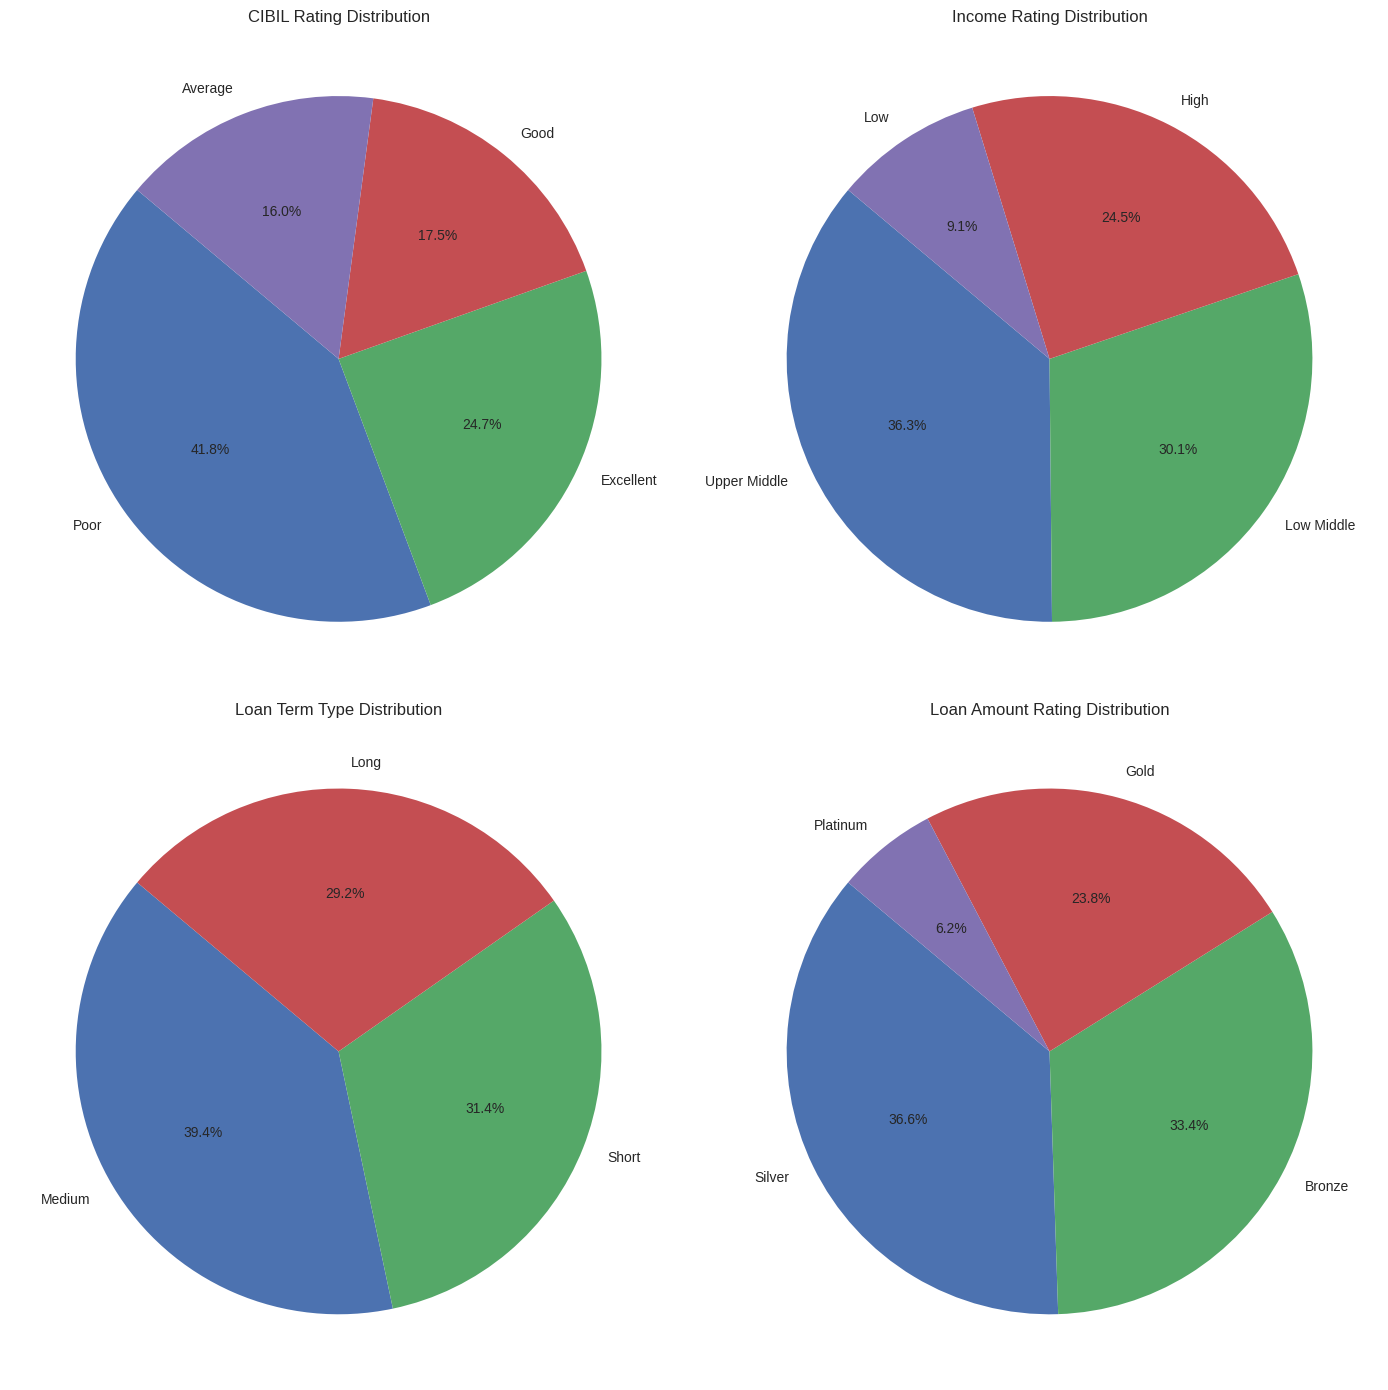

In [ ]:
# Display the counts
print("CIBIL Rating Counts:\n", cibil_rating_counts)
print("\nIncome Rating Counts:\n", income_rating_counts)
print("\nLoan Term Type Counts:\n", loan_term_type_counts)
print("\nLoan Amount Rating Counts:\n", loan_amount_rating_counts)

# Plot Pie Charts
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Plot CIBIL Rating Counts
axs[0, 0].pie(cibil_rating_counts, labels=cibil_rating_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('CIBIL Rating Distribution')

# Plot Income Rating Counts
axs[0, 1].pie(income_rating_counts, labels=income_rating_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Income Rating Distribution')

# Plot Loan Term Type Counts
axs[1, 0].pie(loan_term_type_counts, labels=loan_term_type_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Loan Term Type Distribution')

# Plot Loan Amount Rating Counts
axs[1, 1].pie(loan_amount_rating_counts, labels=loan_amount_rating_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Loan Amount Rating Distribution')

plt.tight_layout()
plt.show()

Loan Status Counts:
 loan_status_map
1    2656
0    1613
Name: count, dtype: int64


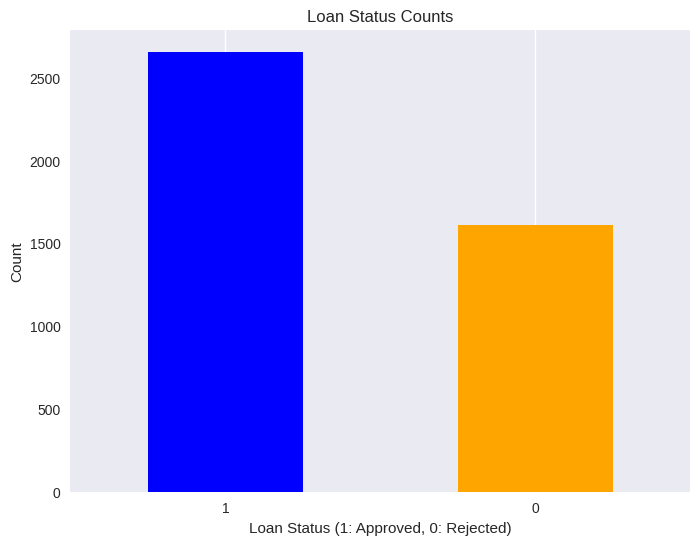

In [ ]:
# Mapping Loan Status Approved to 1 and Rejected to 0
df["loan_status_map"] = df["loan_status"].map({"Approved" : 1, "Rejected" : 0})

# Count the occurrences of each Loan Status
loan_status_map_counts = df['loan_status_map'].value_counts()

# Display the counts
print("Loan Status Counts:\n", loan_status_map_counts)

# Plot the Loan Status Counts
plt.figure(figsize=(8, 6))
loan_status_map_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Loan Status Counts')
plt.xlabel('Loan Status (1: Approved, 0: Rejected)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_rating,loan_term_type,loan_amount_rating,loan_status_map
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Medium,Gold,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Medium,Silver,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Long,Gold,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Medium,Platinum,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Long,Gold,0
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor,Upper Middle,Medium,Silver,0
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good,High,Short,Platinum,1
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor,Upper Middle,Long,Silver,0
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent,Low,Long,Bronze,1
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor,Low Middle,Medium,Bronze,0


In [ ]:
# Create DataFrame
dff = pd.DataFrame(df)

# Convert the Self Employed variable Yes to 1 and No to 0
dff["self_employed"] = dff["self_employed"].map({"Yes" : 1, "No" : 0})

# Convert the Education variable Graduate as 2 and Not Graduate as 1
dff["education"] = dff["education"].map({"Graduate" : 2, "Not Graduate" : 1})

# Display the first 5 rows of the DataFrame
dff.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_rating,loan_term_type,loan_amount_rating,loan_status_map
0,1,2,2,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Medium,Gold,1
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Medium,Silver,0
2,3,3,2,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Long,Gold,0
3,4,3,2,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Medium,Platinum,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Long,Gold,0


In [ ]:
# Dropping the 'loan_status', 'loan_status_map', and others columns
dfm = df.columns.difference(['loan_status', 'loan_status_map', 'cibil_rating',	'income_rating',	'loan_term_type',	'loan_amount_rating'])

In [ ]:
dfmm = df.columns.difference(['loan_status', 'cibil_rating',	'income_rating',	'loan_term_type',	'loan_amount_rating'])
d = dff[dfmm]
d.head(10)

,bank_asset_value,cibil_score,commercial_assets_value,education,income_annum,loan_amount,loan_id,loan_status_map,loan_term,luxury_assets_value,no_of_dependents,residential_assets_value,self_employed
0,8000000,778,17600000,2,9600000,29900000,1,1,12,22700000,2,2400000,0
1,3300000,417,2200000,1,4100000,12200000,2,0,8,8800000,0,2700000,1
2,12800000,506,4500000,2,9100000,29700000,3,0,20,33300000,3,7100000,0
3,7900000,467,3300000,2,8200000,30700000,4,0,8,23300000,3,18200000,0
4,5000000,382,8200000,1,9800000,24200000,5,0,20,29400000,5,12400000,1
5,5100000,319,8300000,2,4800000,13500000,6,0,10,13700000,0,6800000,1
6,4300000,678,14800000,2,8700000,33000000,7,1,4,29200000,5,22500000,0
7,6000000,382,5700000,2,5700000,15000000,8,0,20,11800000,2,13200000,1
8,600000,782,800000,2,800000,2200000,9,1,20,2800000,0,1300000,1
9,1600000,388,1400000,1,1100000,4300000,10,0,10,3300000,5,3200000,0


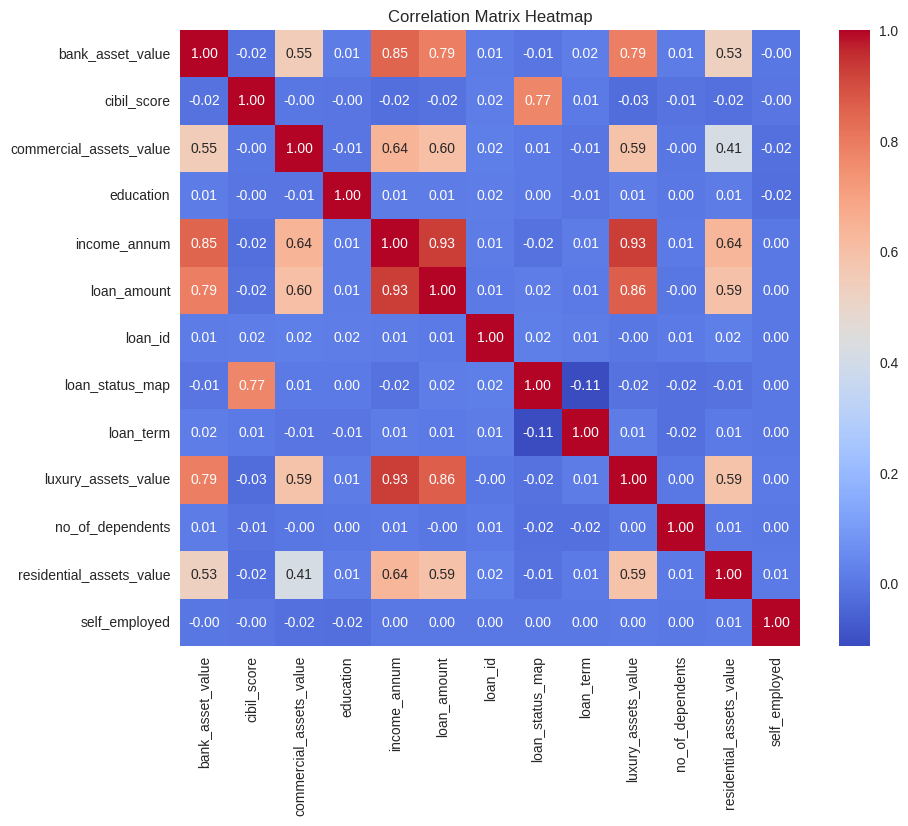

In [ ]:
correlation_matrix = d.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

correlation_matrix = d.corr()

# Find features with high correlation
threshold = 0.5  # Adjust the threshold as needed
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{d.columns[feature1]} and {d.columns[feature2]} are highly correlated.")

bank_asset_value and commercial_assets_value are highly correlated.
bank_asset_value and income_annum are highly correlated.
bank_asset_value and loan_amount are highly correlated.
bank_asset_value and luxury_assets_value are highly correlated.
bank_asset_value and residential_assets_value are highly correlated.
cibil_score and loan_status_map are highly correlated.
commercial_assets_value and bank_asset_value are highly correlated.
commercial_assets_value and income_annum are highly correlated.
commercial_assets_value and loan_amount are highly correlated.
commercial_assets_value and luxury_assets_value are highly correlated.
income_annum and bank_asset_value are highly correlated.
income_annum and commercial_assets_value are highly correlated.
income_annum and loan_amount are highly correlated.
income_annum and luxury_assets_value are highly correlated.
income_annum and residential_assets_value are highly correlated.
loan_amount and bank_asset_value are highly correlated.
loan_amount

# *Method 1: Comparing Models Decision Tree, Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machine, K-Nearest Neighbour  and Cross Validation Score*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Separating Training and Testing Data
x = dff[dfm]
y = df["loan_status_map"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.20)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.dropna()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Imputing missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Imputing missing values in the target set (if necessary)
imputer_y = SimpleImputer(strategy='most_frequent')
Y_train_imputed = imputer_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

# Creating and training the Decision Tree Classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_imputed, Y_train_imputed)

# Imputing missing values in the test set
X_test_imputed = imputer.transform(X_test)

# Making predictions on the test set
Y_predict_dt = dt_model.predict(X_test_imputed)

# Calculating the accuracy of the model
accuracy_dt = accuracy_score(Y_test, Y_predict_dt) * 100
print("Decision Tree Classifier Accuracy:", accuracy_dt, '%')

Decision Tree Classifier Accuracy: 97.65807962529274 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

X_train_aligned, Y_train_aligned = X_train.align(Y_train, axis=0)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_aligned)

imputer_y = SimpleImputer(strategy='most_frequent')
Y_train_imputed = imputer_y.fit_transform(Y_train_aligned.values.reshape(-1, 1)).ravel()

model = LogisticRegression()
model.fit(X_train_imputed, Y_train_imputed)

imputer = SimpleImputer(strategy='mean')
num_cols = X_test.shape[1]
X_test_imputed = imputer.fit_transform(X_test.values.reshape(-1, num_cols))

imputer_y = SimpleImputer(strategy='most_frequent')
Y_test_imputed = imputer_y.fit_transform(Y_test.values.reshape(-1,1))

label_encoder = LabelEncoder()
Y_test_encoded = label_encoder.fit_transform(Y_test_imputed.ravel())

Y_predict_lr = model.predict(X_test_imputed)

accuracy_lr = accuracy_score(Y_test_encoded, Y_predict_lr)*100
print("Logistic Regression Accuracy:", accuracy_lr, '%')

Logistic Regression Accuracy: 63.70023419203748 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

imputer_y = SimpleImputer(strategy='most_frequent')
Y_train_imputed = imputer_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

model = RandomForestClassifier()
model.fit(X_train_imputed, Y_train_imputed)

X_test_imputed = imputer.transform(X_test)

Y_predict_rf = model.predict(X_test_imputed)

accuracy_rf = accuracy_score(Y_test, Y_predict_rf)*100
print("Random Forest Classifier Accuracy:", accuracy_rf, '%')

Random Forest Classifier Accuracy: 97.89227166276346 %


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

imputer_y = SimpleImputer(strategy='most_frequent')
Y_train_imputed = imputer_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

model = GradientBoostingClassifier()
model.fit(X_train_imputed, Y_train_imputed)

X_test_imputed = imputer.transform(X_test)

Y_predict_gb = model.predict(X_test_imputed)

accuracy_gb = accuracy_score(Y_test, Y_predict_gb)*100
print("Gradient Boosting Classifier Accuracy:", accuracy_gb, '%')

Gradient Boosting Classifier Accuracy: 97.65807962529274 %


In [ ]:
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

imputer_y = SimpleImputer(strategy='most_frequent')
Y_train_imputed = imputer_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

svm_model = SVC()
svm_model.fit(X_train_imputed, Y_train_imputed)

X_test_imputed = imputer.transform(X_test)

Y_predict_svm = svm_model.predict(X_test_imputed)

accuracy_svm = accuracy_score(Y_test, Y_predict_svm) * 100
print("Support Vector Machine Accuracy:", accuracy_svm, '%')

Support Vector Machine Accuracy: 62.76346604215457 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

imputer_y = SimpleImputer(strategy='most_frequent')
Y_train_imputed = imputer_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, Y_train_imputed)

X_test_imputed = imputer.transform(X_test)

Y_predict_knn = knn_model.predict(X_test_imputed)

accuracy_knn = accuracy_score(Y_test, Y_predict_knn) * 100
print("K-Nearest Neighbors Accuracy:", accuracy_knn, '%')

K-Nearest Neighbors Accuracy: 57.72833723653395 %


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=25)

print("Cross-validated Accuracy Scores:", scores*100)
print("Mean Accuracy:", scores.mean()*100)

Cross-validated Accuracy Scores: [ 99.41520468  96.49122807  98.24561404  98.24561404  97.66081871
  98.24561404  97.07602339  98.24561404  98.24561404  98.83040936
  98.83040936  97.66081871  97.66081871  98.83040936  98.83040936
  98.24561404  97.66081871  98.83040936  97.07602339  98.23529412
  96.47058824  98.23529412 100.          99.41176471  97.64705882]
Mean Accuracy: 98.17309941520467


In [ ]:
compare = pd.DataFrame({'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Suport Vector Machine','K-Nearest Neighbors ',],
                        'Accuracy': [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_gb, accuracy_svm, accuracy_knn]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,97.892272
0,Decision Tree,97.658080
3,Gradient Boosting,97.658080
1,Logistic Regression,63.700234
4,Suport Vector Machine,62.763466
5,K-Nearest Neighbors,57.728337


# *Method 2: Confussion Matrix and Comparing Models Decision Tree, Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machine, K-Nearest Neighbour*


In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
import os
import scipy
from sklearn.preprocessing import QuantileTransformer
from imblearn.over_sampling import SMOTE

# Separating Training and Testing Data
x = dff[dfm]
y = df["loan_status_map"]

X, Y = SMOTE().fit_resample(x, y)
X = MinMaxScaler().fit_transform(X)

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X.shape, X_train.shape, X_test.shape)

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    # Predict the labels for the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    acc = accuracy_score(Y_test, y_pred)
    print(f'{model.__class__.__name__} accuracy: {acc:.2f}%')

    # Print the classification report
    print("\nClassification Report:\n", classification_report(Y_test, y_pred))

    # Print the confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)
    print("\nConfusion Matrix:\n", conf_matrix)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model.__class__.__name__} Confusion Matrix')
    plt.show()

def evaluate_model_acc(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(Y_test, y_pred)

(5312, 12) (4249, 12) (1063, 12)


DecisionTreeClassifier accuracy: 0.98%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       522
           1       0.99      0.98      0.98       541

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063


Confusion Matrix:
 [[515   7]
 [ 10 531]]


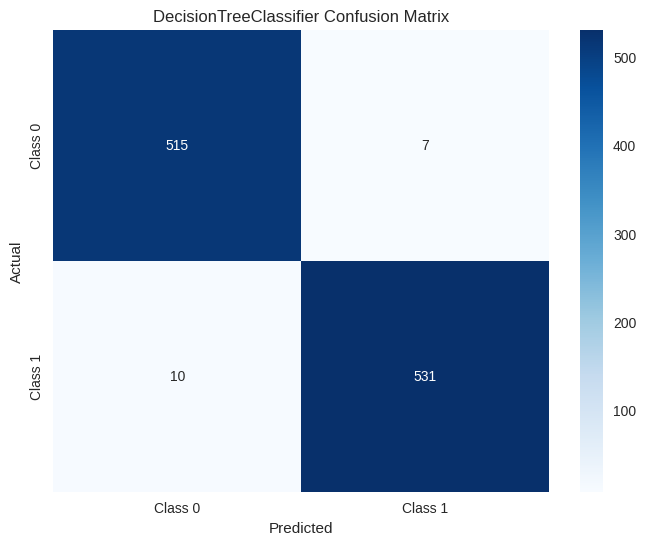

LogisticRegression accuracy: 0.93%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       522
           1       0.94      0.92      0.93       541

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063


Confusion Matrix:
 [[493  29]
 [ 44 497]]


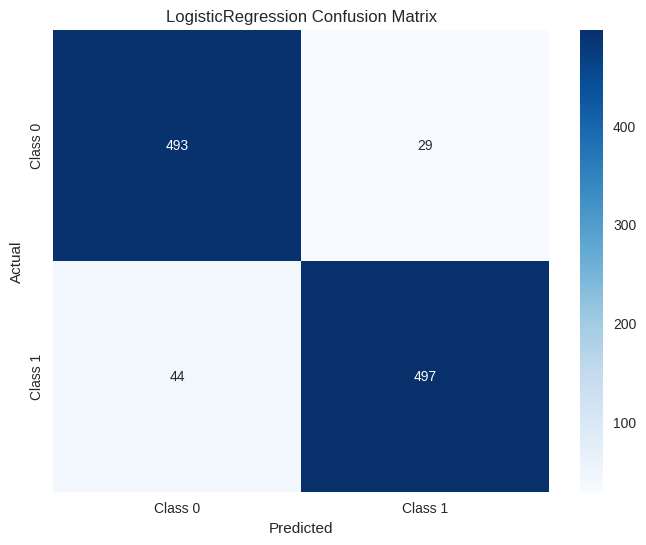

RandomForestClassifier accuracy: 0.98%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       522
           1       0.99      0.98      0.98       541

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063


Confusion Matrix:
 [[514   8]
 [ 11 530]]


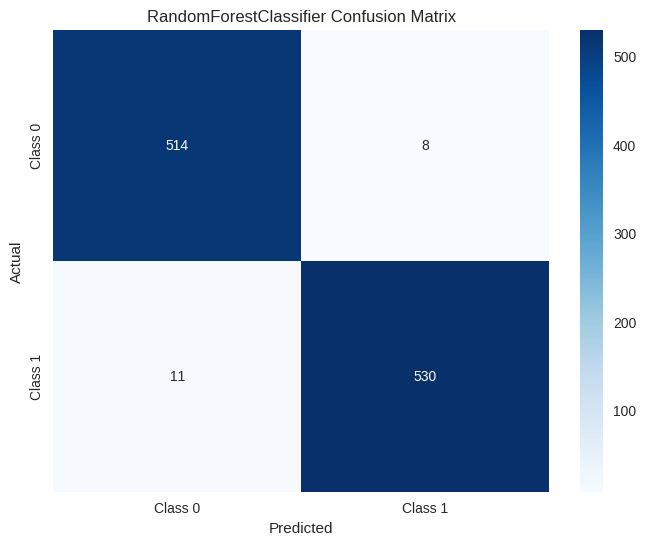

GradientBoostingClassifier accuracy: 0.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       522
           1       0.99      0.99      0.99       541

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063


Confusion Matrix:
 [[515   7]
 [  5 536]]


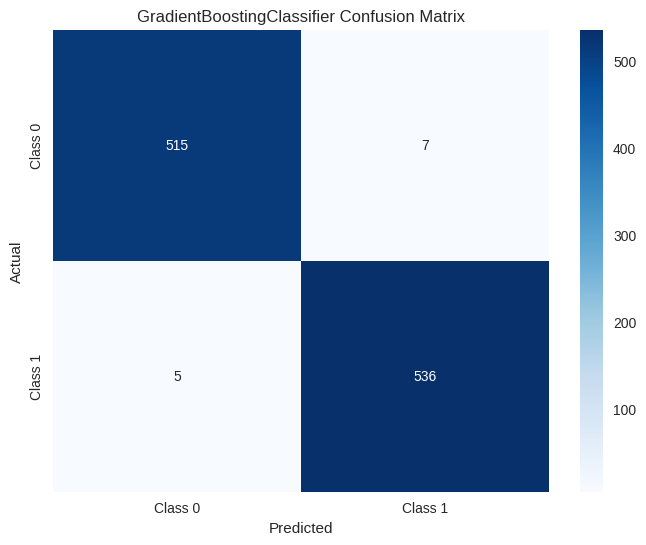

SVC accuracy: 0.93%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       522
           1       0.96      0.91      0.93       541

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063


Confusion Matrix:
 [[499  23]
 [ 48 493]]


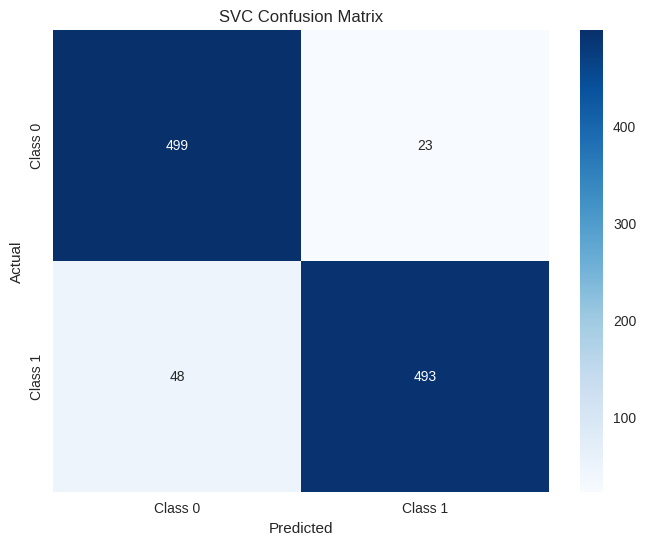

KNeighborsClassifier accuracy: 0.91%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       522
           1       0.94      0.87      0.90       541

    accuracy                           0.91      1063
   macro avg       0.91      0.91      0.91      1063
weighted avg       0.91      0.91      0.91      1063


Confusion Matrix:
 [[490  32]
 [ 68 473]]


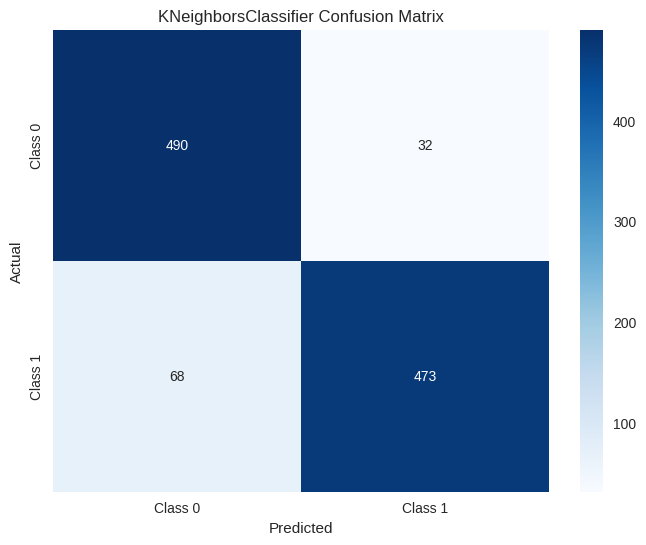

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
evaluate_model(dt_model, X_train, Y_train, X_test, Y_test)

# Logistic Regression
logistic_model = LogisticRegression(random_state=0, max_iter=10000)
evaluate_model(logistic_model, X_train, Y_train, X_test, Y_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
evaluate_model(rf_model, X_train, Y_train, X_test, Y_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=0)
evaluate_model(gb_model, X_train, Y_train, X_test, Y_test)

# Support Vector Machine
svm_model = SVC(kernel='linear', random_state=0)
evaluate_model(svm_model, X_train, Y_train, X_test, Y_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, Y_train, X_test, Y_test)

In [ ]:
# Decision Tree Accuracy
dt_accuracy = evaluate_model_acc(dt_model, X_train, Y_train, X_test, Y_test) * 100

# Logistic Regression Accuracy
lr_accuracy = evaluate_model_acc(dt_model, X_train, Y_train, X_test, Y_test) * 100

# Random Forest Accuracy
rf_accuracy = evaluate_model_acc(rf_model, X_train, Y_train, X_test, Y_test) * 100

# Gradient Boosting Accuracy
gb_accuracy = evaluate_model_acc(gb_model, X_train, Y_train, X_test, Y_test) * 100

# Support Vector Machine Accuracy
svm_accuracy = evaluate_model_acc(svm_model, X_train, Y_train, X_test, Y_test) * 100

# K-Nearest Neighbors Accuracy
knn_accuracy = evaluate_model_acc(knn_model, X_train, Y_train, X_test, Y_test) * 100

compare = pd.DataFrame({'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Suport Vector Machine','K-Nearest Neighbors',],
                        'Accuracy': [dt_accuracy, lr_accuracy, rf_accuracy, gb_accuracy, svm_accuracy, knn_accuracy]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Gradient Boosting,98.871119
0,Decision Tree,98.400753
1,Logistic Regression,98.400753
2,Random Forest,98.212606
4,Suport Vector Machine,93.320790
5,K-Nearest Neighbors,90.592662


# *Comparing 2 Methods*

In [ ]:
compare = pd.DataFrame({'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Suport Vector Machine','K-Nearest Neighbors',],
                        'Method 1': [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_gb, accuracy_svm, accuracy_knn],
                        'Method 2': [dt_accuracy, lr_accuracy, rf_accuracy, gb_accuracy, svm_accuracy, knn_accuracy]})

print(compare)

                   Model   Method 1   Method 2
0          Decision Tree  97.658080  98.400753
1    Logistic Regression  63.700234  98.400753
2          Random Forest  97.892272  98.212606
3      Gradient Boosting  97.658080  98.871119
4  Suport Vector Machine  62.763466  93.320790
5    K-Nearest Neighbors  57.728337  90.592662


# *Best Prediction Graphs for Decision Tree, Random Forest, and Gradient Boosting*

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
import os
import scipy
from sklearn.preprocessing import QuantileTransformer
from imblearn.over_sampling import SMOTE

# Separating Training and Testing Data
x = dff[dfm]
y = df["loan_status_map"]

X, Y = SMOTE().fit_resample(x, y)
X = MinMaxScaler().fit_transform(X)

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(5312, 12) (4249, 12) (1063, 12)


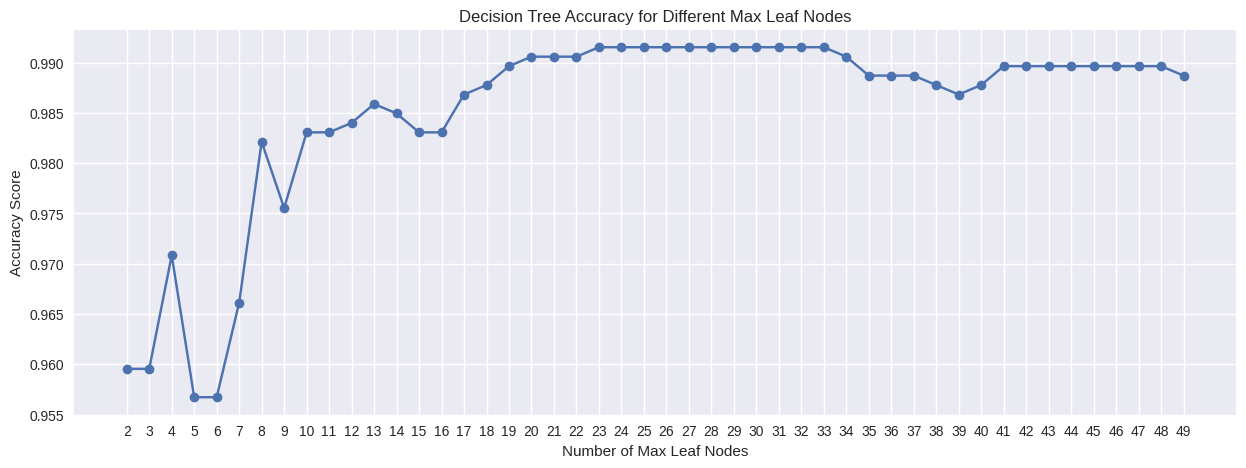

Best Decision Tree Accuracy: 99.15%


In [ ]:
# Initialize list to store accuracy scores
scoreListDT = []

# Loop over different values of max_leaf_nodes to find the best performance
for i in range(2, 50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i, random_state=0)
    DTclassifier.fit(X_train, Y_train)
    scoreListDT.append(DTclassifier.score(X_test, Y_test))

# Plotting the accuracy scores
plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), scoreListDT, marker='o')
plt.xticks(np.arange(2, 50, 1))
plt.xlabel("Number of Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Decision Tree Accuracy for Different Max Leaf Nodes")
plt.grid(True)
plt.show()

# Finding and printing the best accuracy score
DTAcc = max(scoreListDT)
print("Best Decision Tree Accuracy: {:.2f}%".format(DTAcc * 100))

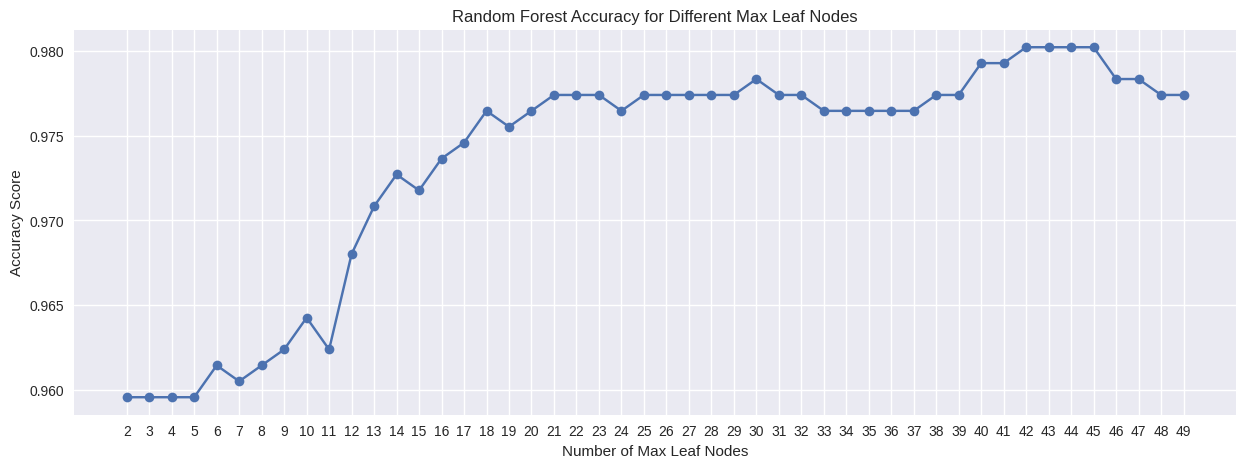

Best Random Forest Accuracy: 98.02%


In [ ]:
# Initialize list to store accuracy scores
scoreListRF = []

# Loop over different values of max_leaf_nodes to find the best performance
for i in range(2, 50):
    RFclassifier = RandomForestClassifier(max_leaf_nodes=i, random_state=0, n_estimators=100)
    RFclassifier.fit(X_train, Y_train)
    scoreListRF.append(RFclassifier.score(X_test, Y_test))

# Plotting the accuracy scores
plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), scoreListRF, marker='o')
plt.xticks(np.arange(2, 50, 1))
plt.xlabel("Number of Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Accuracy for Different Max Leaf Nodes")
plt.grid(True)
plt.show()

# Finding and printing the best accuracy score
RFAcc = max(scoreListRF)
print("Best Random Forest Accuracy: {:.2f}%".format(RFAcc * 100))


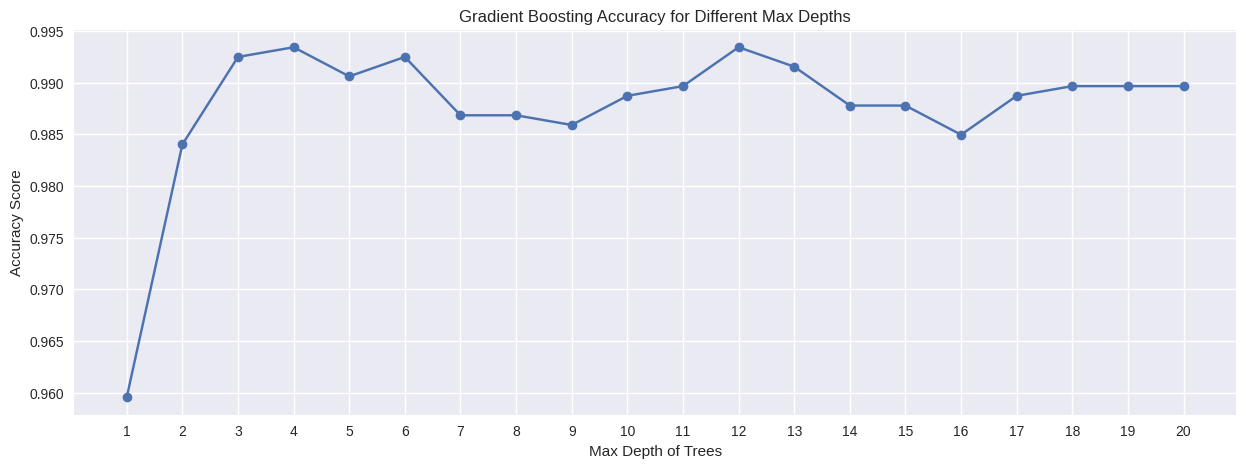

Best Gradient Boosting Accuracy: 99.34%


In [ ]:
# Initialize list to store accuracy scores
scoreListGB = []

# Loop over different values of max_depth to find the best performance
for i in range(1, 21):
    GBclassifier = GradientBoostingClassifier(max_depth=i, random_state=0, n_estimators=100)
    GBclassifier.fit(X_train, Y_train)
    scoreListGB.append(GBclassifier.score(X_test, Y_test))

# Plotting the accuracy scores
plt.figure(figsize=(15, 5))
plt.plot(range(1, 21), scoreListGB, marker='o')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Max Depth of Trees")
plt.ylabel("Accuracy Score")
plt.title("Gradient Boosting Accuracy for Different Max Depths")
plt.grid(True)
plt.show()

# Finding and printing the best accuracy score
GBAcc = max(scoreListGB)
print("Best Gradient Boosting Accuracy: {:.2f}%".format(GBAcc * 100))

In [ ]:
compare = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
                        'Accuracy': [DTAcc*100, RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Gradient Boosting,99.341486
0,Decision Tree,99.153340
1,Random Forest,98.024459


# *Decision Tree*

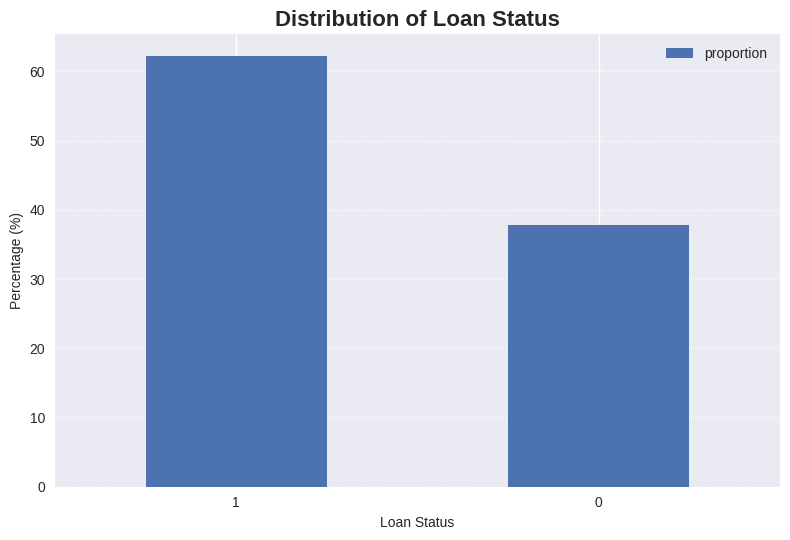

In [ ]:
# Supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

# Separating Training and Testing Data
x = dff[dfm]
y = df["loan_status_map"]

# 80% Training and 20% Testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,random_state = 100)

# Check the proportion of data
y_train.value_counts(normalize = True) * 100

# Plot the distribution
pd.DataFrame(y_train.value_counts(normalize = True) * 100).plot(kind = "bar")

# Customize the plot
plt.title("Distribution of Loan Status", fontsize=16, weight='bold')
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Percentage (%)", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Create a pipeline for Decision Tree model
pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

# Create a cross validation object from decision tree classifier and it's hyperparameters
clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

# Fit the model with train data
clf_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid
param_grid = {
    'decisiontreeclassifier__max_depth': np.arange(3, 12),
    'decisiontreeclassifier__max_features': np.arange(3, 10),
    'decisiontreeclassifier__min_samples_leaf': np.array([1, 2]),
    'decisiontreeclassifier__min_samples_split': np.arange(2, 16)
}

# Create a pipeline with a decision tree classifier
pipeline = Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3, random_state=100))])

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Display the best parameters for Decision Tree Model
clf_model.best_params_

Best parameters found:  {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': 9, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}


{'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_features': 9,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [ ]:
# Display the best score for the fitted model
clf_model.best_score_

0.9756954612005858

In [ ]:
# Predicting the Test Cases
bankloans_test_pred_dt = pd.DataFrame({'actual':y_test, 'predicted': clf_model.predict(x_test)})
bankloans_test_pred_dt = bankloans_test_pred_dt.reset_index(drop = True)

# Predicted Probability
bankloans_test_pred_dt["predicted_prob"] = pd.DataFrame([p[1] for p in clf_model.predict_proba(x_test)])
bankloans_test_pred_dt.head()

,actual,predicted,predicted_prob
0,1,1,1.0
1,1,1,1.0
2,1,1,1.0
3,1,1,1.0
4,0,0,0.0


In [ ]:
# Classification Report
print(metrics.classification_report(bankloans_test_pred_dt.actual, bankloans_test_pred_dt.predicted))

# Confusion Matrix
metrics.confusion_matrix(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.99      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



array([[315,   8],
       [  5, 526]])

In [ ]:
# Calculating the recall score
print("Recall Score:",round(metrics.recall_score(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted) * 100,3))

# Calculating the precision score
print("Precision Score:",round(metrics.precision_score(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted) * 100,3))

# Compute f1 Score
print("F1 Score:", round(metrics.f1_score(bankloans_test_pred_dt.actual, bankloans_test_pred_dt.predicted)*100,3))

Recall Score: 99.058
Precision Score: 98.502
F1 Score: 98.779


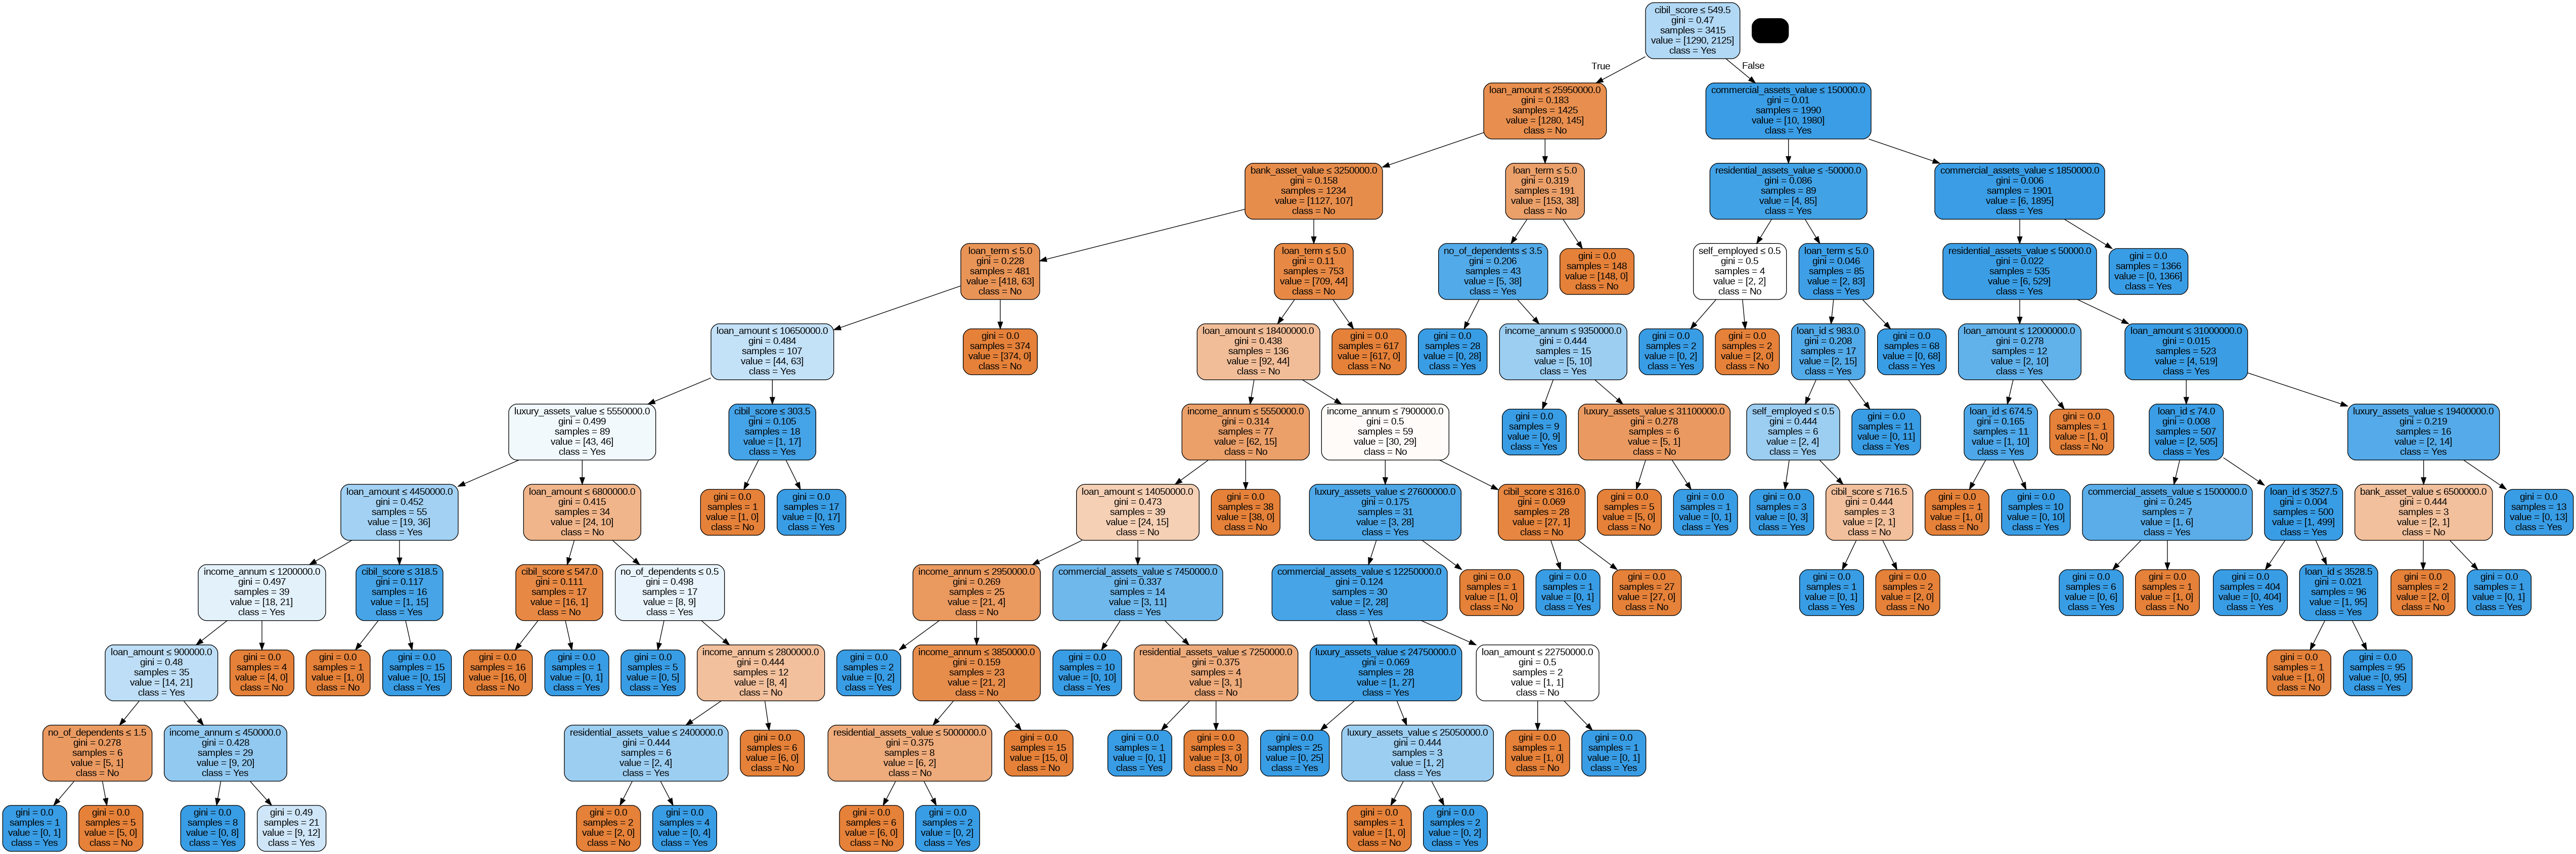

In [ ]:
!pip install pydotplus

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus as pdot
import graphviz as graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

# Write the dot data
dot_data = StringIO()

# Saving into a variable to get graph
clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

# Export the decision tree
export_graphviz(clf_best_model,out_file=dot_data,filled=True,
                rounded=True,special_characters=True,feature_names = x_train.columns.values,class_names = ["No","Yes"])
graph = pdot.graph_from_dot_data(dot_data.getvalue())

# Display the Tree
Image(graph.create_png())

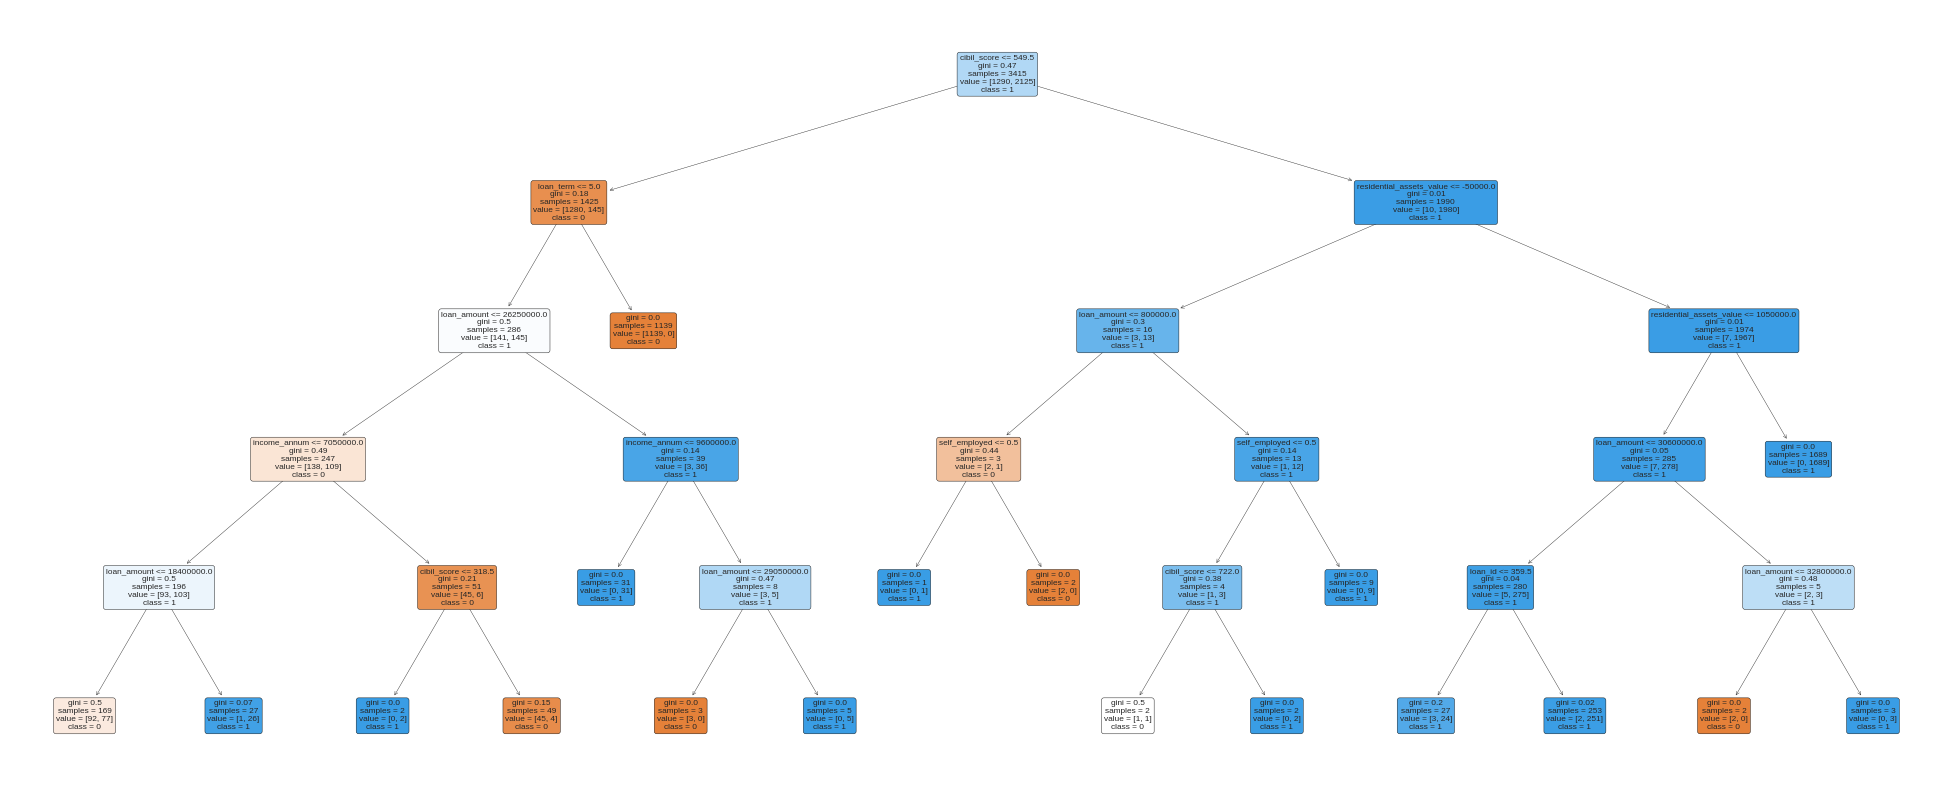

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree Classifier with max_depth set to 5
clf = DecisionTreeClassifier(max_depth=5, random_state=100)
clf.fit(x_train, y_train)

# Visualize the tree
plt.figure(figsize=(25,10))  # Set the figure size (optional)
plot_tree(clf, filled=True, feature_names=dfm, class_names=np.unique(y).astype(str), rounded=True, proportion=False, precision=2)
plt.show()

# *Loan Approval*

In [ ]:
def predict_loan_approval(new_data):

    # Convert the input data into a DataFrame
    input_data = pd.DataFrame([new_data], columns=[
        'bank_asset_value', 'cibil_score', 'commercial_assets_value',
        'education', 'income_annum', 'loan_amount', 'loan_id',
        'loan_term', 'luxury_assets_value', 'no_of_dependents',
        'residential_assets_value', 'self_employed'
    ])

    # Predict using the trained classifier
    prediction = clf_model.predict(input_data)

    # Check if the loan is approved or not
    if prediction[0] == 1:
        return "Approved"
    else:
        return "Not Approved"

In [ ]:
# New loan application data for first application
new_application_1 = {
    'loan_id': 10001,
    'no_of_dependents': 2,
    'education': 2,
    'self_employed': 1,
    'income_annum': 200000,
    'loan_amount': 500000,
    'loan_term': 6,
    'cibil_score': 885,
    'residential_assets_value': -100000,
    'commercial_assets_value': 0,
    'luxury_assets_value': 300000,
    'bank_asset_value': 200000
}

# Call the function and print the result
result_1 = predict_loan_approval(new_application_1)
print("Loan application status:", result_1)

Loan application status: Not Approved


In [ ]:
# New loan application data for second application
new_application_2 = {
    'loan_id': 10002,
    'no_of_dependents': 0,
    'education': 1,
    'self_employed': 1,
    'income_annum': 4300000,
    'loan_amount': 16300000,
    'loan_term': 14,
    'cibil_score': 792,
    'residential_assets_value': 400000,
    'commercial_assets_value': 400000,
    'luxury_assets_value': 10200000,
    'bank_asset_value': 4000000
}

# Call the function and print the result for the third application
result_2 = predict_loan_approval(new_application_2)
print("New loan application status:", result_2)

New loan application status: Approved


In [ ]:
# New loan application data for third application
new_application_3 = {
    'loan_id': 10003,
    'no_of_dependents': 1,
    'education': 1,
    'self_employed': 1,
    'income_annum': 3300000,
    'loan_amount': 10800000,
    'loan_term': 2,
    'cibil_score': 550,
    'residential_assets_value': 6000000,
    'commercial_assets_value': 3800000,
    'luxury_assets_value': 11000000,
    'bank_asset_value': 4700000
}

# Call the function and print the result for the third application
result_3 = predict_loan_approval(new_application_3)
print("New loan application status:", result_3)

New loan application status: Approved


In [ ]:
# New loan application data for fourth application
new_application_4 = {
    'loan_id': 10004,
    'no_of_dependents': 5,
    'education': 2,
    'self_employed': 0,
    'income_annum': 7900000,
    'loan_amount': 28600000,
    'loan_term': 12,
    'cibil_score': 812,
    'residential_assets_value': 12100000,
    'commercial_assets_value': 14400000,
    'luxury_assets_value': 30000000,
    'bank_asset_value': 11700000
}

# Call the function and print the result for the fourth application
result_4 = predict_loan_approval(new_application_4)
print("New loan application status:", result_4)

New loan application status: Approved


In [ ]:
# New loan application data for fifth application
new_application_5 = {
    'loan_id': 10005,
    'no_of_dependents': 4,
    'education': 1,
    'self_employed': 0,
    'income_annum': 8200000,
    'loan_amount': 20700000,
    'loan_term': 10,
    'cibil_score': 546,
    'residential_assets_value': 10800000,
    'commercial_assets_value': 7000000,
    'luxury_assets_value': 25000000,
    'bank_asset_value': 10600000
}

# Call the function and print the result for the fifth application
result_5 = predict_loan_approval(new_application_5)
print("New loan application status:", result_5)

New loan application status: Not Approved


In [ ]:
def predict_loan_approval():
    # Prompt user for input
    loan_id = int(input("Enter loan ID: "))
    no_of_dependents = int(input("Enter number of dependents: "))
    education = int(input("Enter education level (1 for Graduate, 2 for Not Graduate): "))
    self_employed = int(input("Are you self-employed? (0 for No, 1 for Yes): "))
    income_annum = int(input("Enter annual income: "))
    loan_amount = int(input("Enter loan amount: "))
    loan_term = int(input("Enter loan term in years: "))
    cibil_score = int(input("Enter CIBIL score: "))
    residential_assets_value = int(input("Enter residential assets value: "))
    commercial_assets_value = int(input("Enter commercial assets value: "))
    luxury_assets_value = int(input("Enter luxury assets value: "))
    bank_asset_value = int(input("Enter bank asset value: "))

    # Create a dictionary from the inputs
    new_data = {
        'loan_id': loan_id,
        'no_of_dependents': no_of_dependents,
        'education': education,
        'self_employed': self_employed,
        'income_annum': income_annum,
        'loan_amount': loan_amount,
        'loan_term': loan_term,
        'cibil_score': cibil_score,
        'residential_assets_value': residential_assets_value,
        'commercial_assets_value': commercial_assets_value,
        'luxury_assets_value': luxury_assets_value,
        'bank_asset_value': bank_asset_value
    }

    # Convert the input data into a DataFrame
    input_data = pd.DataFrame([new_data], columns=[
        'bank_asset_value', 'cibil_score', 'commercial_assets_value',
        'education', 'income_annum', 'loan_amount', 'loan_id',
        'loan_term', 'luxury_assets_value', 'no_of_dependents',
        'residential_assets_value', 'self_employed'
    ])

    # Predict using the trained classifier
    prediction = clf_model.predict(input_data)

    # Check if the loan is approved or not
    if prediction[0] == 1:
        return "Approved"
    else:
        return "Not Approved"

# Execute the function and print the result
result = predict_loan_approval()
print("Loan application status:", result)

Enter loan ID: 10010
Enter number of dependents: 0
Enter education level (1 for Graduate, 2 for Not Graduate): 1
Are you self-employed? (0 for No, 1 for Yes): 1
Enter annual income: 4300000
Enter loan amount: 16300000
Enter loan term in years: 14
Enter CIBIL score: 792
Enter residential assets value: 400000
Enter commercial assets value: 400000
Enter luxury assets value: 10200000
Enter bank asset value: 4000000
Loan application status: Approved
